In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-us-songs-from-1950-to-2019-w-lyrics/topSongsLyrics1950_2019.csv


# Intro

Hello, in this short notebook we are going to do some simple but nice EDA on the Top US Songs from 1950 to 2019 dataset.

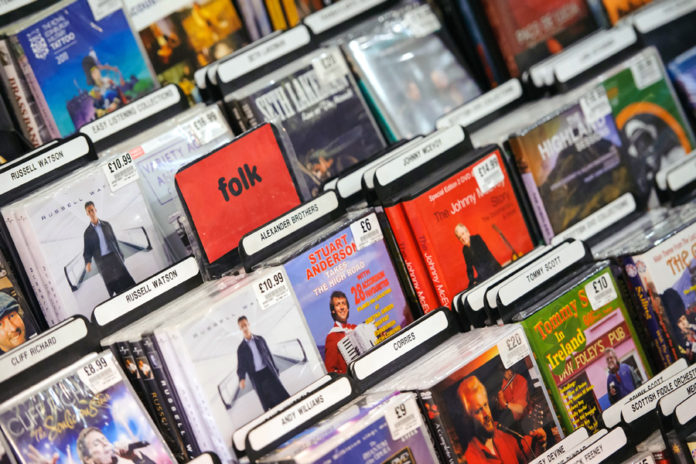

And of course we will have some nice plots :)

# Imports
A good start is to load all we need, so let's do that! :)

In [2]:
import pandas as pd

import nltk
from nltk.corpus import stopwords

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import string

# Loading the Data

In [3]:
# basic pandas stuff, nothing to see here
df = pd.read_csv("/kaggle/input/top-us-songs-from-1950-to-2019-w-lyrics/topSongsLyrics1950_2019.csv")

# also add this in order to better see the results
pd.set_option('display.max_columns', None)
pd.set_option('expand_frame_repr', False)

# Basic EDA

In [4]:
# let's start by printing the shape of our data
print(df.shape)

# let's inspect the column names
print(df.columns)

# now we will check unique years, we should have 70 years
print(df["year"].unique())

df.head(20)

(700, 5)
Index(['year', 'rank', 'artist', 'song', 'lyrics'], dtype='object')
[1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


,year,rank,artist,song,lyrics
0,1950,1,Fats Domino,The Fat Man,"They call, they call me the fat man|'Cause I w..."
1,1950,2,Percy Mayfield,Please Send Me Someone To Love,"Understanding and peace of mind|But, if it's n..."
2,1950,3,Ruth Brown,Teardrops From My Eyes,I think of you|And that's the time|I feel so b...
3,1950,4,Nat King Cole,Mona Lisa,"Mona Lisa, Mona Lisa, men have named you|You'r..."
4,1950,5,Patti Page,Tennessee Waltz,When an old friend I happened to see|I Introdu...
5,1950,6,Hank Williams,Long Gone Lonesome Blues,But I got to the river so lonesome I wanted to...
6,1950,7,Professor Longhair,Mardi Gras In New Orleans,"I wanna see the Mardi Gras|Yes, I'm goin' to N..."
7,1950,8,Hank Snow,I'm Movin' On,That big eight wheeler a rollin' down the trac...
8,1950,9,Muddy Waters,Rollin' Stone,"Well, I wish I was a catfish|Swimming in a oh,..."
9,1950,10,Johnny Otis (Little Esther & the Robins),Double Crossing Blues,"Frailty, thy name is WOMAN.”| The Earth waits..."


# Lyrics Tokenization
We will declare a function to use in order to tokenize our lyrics, we will use nltk for the tokenizer and for stopwords.

In [5]:
def wordFrequency(row: pd.DataFrame):
    lyrics = row["lyrics"]

    wordFrequency = {}

    # let's create some stop words, we concatenate the standar things and some fragments that polute our particular dataset
    stop = set(stopwords.words('english') + list(string.punctuation) + ["n't", "'re", "'ve", "'ll"])

    for s in lyrics:
        if isinstance(s, str):
            # remember we use the pipe to reprsent a new line
            s = s.replace("|", " ").lower()
            
            # we use nltk's word tokenizer
            arr = nltk.word_tokenize(s)

            for w in arr:
                if len(w) > 2 and not stop.__contains__(w):
                    if wordFrequency.__contains__(w):
                        wordFrequency[w] = wordFrequency[w] + 1
                    else:
                        wordFrequency[w] = 1

    return wordFrequency

# Most common words by year
Here we will group our dataframe by year and compute the most common/frequent words for each year.
We will print a few of there words for all the years, and save a few of them (1962, 1992, 2012) for later use.

In [6]:
grouped = df.groupby("year", group_keys=True)

yearsToWords = {}

for g in grouped:    
    wf = wordFrequency(g[1])
    topWords = sorted(wf.items(), key=lambda x: x[1], reverse=True)
    print(g[0], topWords[0:8])
    
    if g[0] in [1962, 1992, 2012]:
        yearsToWords[g[0]] = topWords[0:20]

1950 [('woman', 274), ('man', 206), ('one', 184), ('would', 183), ('men', 152), ('life', 147), ('women', 143), ('must', 123)]
1951 [('man', 14), ('love', 14), ('know', 12), ('long', 11), ('baby', 11), ('little', 11), ('got', 11), ("'em", 10)]
1952 [('baby', 25), ('mercy', 13), ('mint', 13), ('julep', 13), ('come', 12), ('leave', 11), ('bayou', 10), ('love', 10)]
1953 [('love', 22), ('bop', 21), ('umm', 18), ('honey', 16), ('mama', 16), ('money', 15), ('she-bop', 15), ('get', 14)]
1954 [('like', 92), ('one', 87), ('love', 76), ('old', 62), ('man', 59), ('till', 56), ('good', 49), ('presley', 49)]
1955 [('like', 31), ('tutti', 25), ('frutti', 25), ('rooty', 25), ('true', 21), ('baby', 20), ('well', 20), ('babe', 18)]
1956 [('love', 86), ('beatles', 50), ('baby', 44), ('man', 41), ('elvis', 32), ('bob', 32), ('rolling', 31), ('stones', 31)]
1957 [('love', 37), ('bye', 36), ('rock', 35), ('peggy', 30), ('sue', 24), ('wan', 22), ('day', 21), ('got', 19)]
1958 [('say', 26), ('bamba', 18), ('

# Nice word count graphics for a few years
Now for the pretty part! We will print the top words for the years we save previously in a nice fashion, the more frequenc the words in that year, the biger on the plot!

In [7]:
def plotWordsCount(data):
    wordcount =  {}
    for word, count in data:
        wordcount[word] = count

    wc = WordCloud().generate_from_frequencies(wordcount)
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

most frequent words from 1962


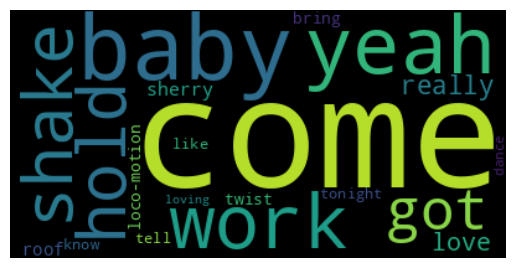

most frequent words from 1992


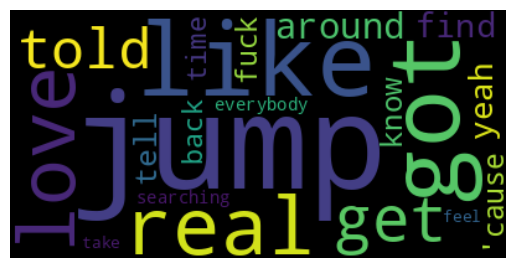

most frequent words from 2012


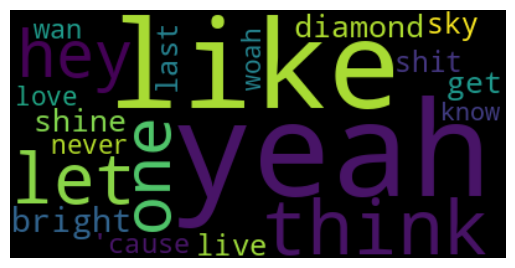

In [8]:
for year, data in yearsToWords.items():
    print(f"most frequent words from {year}")
    plotWordsCount(data)

# Finish!
You have made it to the finish, thank you! Please upvote if you liked this :)